In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

year=2017
data = pd.DataFrame()
while year<2024:
    tmp = pd.read_csv(f'/workspace/BTCUSDT/BTCUSDT-4h-{year}.csv', index_col=0)
    tmp = tmp[['Open','High','Low','Close']]
    data = pd.concat([data, tmp])
    year += 1
data

,Open,High,Low,Close
Open time,,,,
2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99
2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30
2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34
2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23
2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08
...,...,...,...,...
2023-12-31 04:00:00,42175.99,42693.00,42156.09,42537.10
2023-12-31 08:00:00,42537.10,42899.00,42369.15,42518.36
2023-12-31 12:00:00,42518.36,42646.27,42352.76,42457.17


In [2]:
from indicator.RSI import RSI
from indicator.EMA import EMA

data['RSI'] = RSI(data, window=15)
data['EMAF'] = EMA(data, window=20)
data['EMAM'] = EMA(data, window=100)
data['EMAS'] = EMA(data, window=150)

data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
data['TargetNexClose'] = data['Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Close', 'Open time'], axis=1, inplace=True)
data

/tmp/ipykernel_87881/1175406488.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNexClose
0,4333.32,4485.39,4333.32,100.000000,4357.352857,4351.520891,4351.013974,-83.72,0,4352.34
1,4436.06,4485.39,4333.42,50.771656,4356.875442,4351.537111,4351.031537,-27.10,0,4325.23
2,4352.33,4354.84,4200.74,43.098450,4353.861591,4351.016178,4350.689795,-22.48,0,4285.08
3,4307.56,4369.69,4258.56,35.216144,4347.310963,4349.710511,4349.820791,7.31,1,4292.39
4,4285.08,4340.62,4134.61,37.303826,4342.080395,4348.575452,4349.060118,7.86,1,4300.25
...,...,...,...,...,...,...,...,...,...,...
13956,42140.29,42433.49,41965.84,45.613328,42400.802827,42598.237789,42152.125472,361.11,1,42537.10
13957,42175.99,42693.00,42156.09,48.876854,42413.783510,42597.027140,42157.224472,-18.74,0,42518.36
13958,42537.10,42899.00,42369.15,49.300613,42423.743176,42595.469374,42162.007724,-61.19,0,42457.17
13959,42518.36,42646.27,42352.76,46.214425,42426.926683,42592.730773,42165.917158,161.87,1,42619.04


In [3]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNexClose
0,4333.32,4485.39,4333.32,100.000000,4357.352857,4351.520891,4351.013974,-83.72,0,4352.34
1,4436.06,4485.39,4333.42,50.771656,4356.875442,4351.537111,4351.031537,-27.10,0,4325.23
2,4352.33,4354.84,4200.74,43.098450,4353.861591,4351.016178,4350.689795,-22.48,0,4285.08
3,4307.56,4369.69,4258.56,35.216144,4347.310963,4349.710511,4349.820791,7.31,1,4292.39
4,4285.08,4340.62,4134.61,37.303826,4342.080395,4348.575452,4349.060118,7.86,1,4300.25


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
data_set_scaled

array([[0.0222865 , 0.02030903, 0.02339634, ..., 0.50337447, 0.        ,
        0.02185936],
       [0.0238522 , 0.02030903, 0.02339788, ..., 0.50918095, 0.        ,
        0.02144591],
       [0.0225762 , 0.01832655, 0.02135067, ..., 0.50965474, 0.        ,
        0.0208336 ],
       ...,
       [0.60449168, 0.6036415 , 0.61027719, ..., 0.50568496, 0.        ,
        0.60298257],
       [0.60420609, 0.59980365, 0.6100243 , ..., 0.52856016, 1.        ,
        0.60545119],
       [0.60327359, 0.60092025, 0.61131591, ..., 0.47755808, 0.        ,
        0.60033521]], shape=(13961, 10))

In [5]:
X=[]
backcandles=10
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

X= np.moveaxis(X,[0],[2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)


13961
(13951, 10, 8)
(13951, 1)


In [6]:
splitlimit = int(len(X)*0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
input_dim = 8  # 입력 피처 수
hidden_size = 150  # LSTM hidden state 크기
output_dim = 1  # 출력 크기
batch_size = 15
epochs = 30

# PyTorch 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_size, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_dim)
        self.activation = nn.Identity()  # 'linear'와 동일

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)  # hidden state만 사용
        out = self.fc(hidden[-1])  # 마지막 hidden state를 Dense 레이어에 전달
        return self.activation(out)

# 모델 인스턴스 생성
model = LSTMModel(input_dim=input_dim, hidden_size=hidden_size, output_dim=output_dim)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# 학습 데이터 (X_train, y_train) 및 검증 데이터 (X_test, y_test)
# NumPy 데이터를 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 학습 루프
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(X_batch)  # 모델 출력
        loss = criterion(outputs, y_batch.unsqueeze(1))  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        train_loss += loss.item()

    # 검증 루프
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(test_loader):.4f}")


/opt/conda/lib/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([15, 1, 1])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/30, Train Loss: 0.0697, Val Loss: 0.0159
Epoch 2/30, Train Loss: 0.0687, Val Loss: 0.0193
Epoch 3/30, Train Loss: 0.0687, Val Loss: 0.0173
Epoch 4/30, Train Loss: 0.0685, Val Loss: 0.0225
Epoch 5/30, Train Loss: 0.0686, Val Loss: 0.0193
Epoch 6/30, Train Loss: 0.0685, Val Loss: 0.0226
Epoch 7/30, Train Loss: 0.0685, Val Loss: 0.0221
Epoch 8/30, Train Loss: 0.0685, Val Loss: 0.0251
Epoch 9/30, Train Loss: 0.0685, Val Loss: 0.0222
Epoch 10/30, Train Loss: 0.0685, Val Loss: 0.0208
Epoch 11/30, Train Loss: 0.0685, Val Loss: 0.0178
Epoch 12/30, Train Loss: 0.0685, Val Loss: 0.0169
Epoch 13/30, Train Loss: 0.0684, Val Loss: 0.0214
Epoch 14/30, Train Loss: 0.0685, Val Loss: 0.0214
Epoch 15/30, Train Loss: 0.0684, Val Loss: 0.0198
Epoch 16/30, Train Loss: 0.0685, Val Loss: 0.0213
Epoch 17/30, Train Loss: 0.0685, Val Loss: 0.0199
Epoch 18/30, Train Loss: 0.0684, Val Loss: 0.0249
Epoch 19/30, Train Loss: 0.0684, Val Loss: 0.0191
Epoch 20/30, Train Loss: 0.0684, Val Loss: 0.0218
Epoch 21/

In [10]:
model.eval()

# X_test를 사용하여 예측값 계산
with torch.no_grad():  # 기울기 계산 비활성화
    y_pred = model(X_test_tensor)  # 예측 수행

# 결과를 출력
for i in range(2700,2791):
    print(f"Predicted: {y_pred[i].item():.4f}, Actual: {y_test_tensor[i].item():.4f}")
y_test_tensor.shape




Predicted: 0.3059, Actual: 0.6003
Predicted: 0.3064, Actual: 0.5949
Predicted: 0.3065, Actual: 0.5943
Predicted: 0.3054, Actual: 0.5954
Predicted: 0.3072, Actual: 0.5931
Predicted: 0.3056, Actual: 0.5976
Predicted: 0.3062, Actual: 0.5865
Predicted: 0.3056, Actual: 0.5821
Predicted: 0.3064, Actual: 0.5827
Predicted: 0.3047, Actual: 0.5824
Predicted: 0.3061, Actual: 0.5848
Predicted: 0.3048, Actual: 0.5915
Predicted: 0.3062, Actual: 0.6060
Predicted: 0.3044, Actual: 0.6125
Predicted: 0.3054, Actual: 0.6118
Predicted: 0.3058, Actual: 0.6109
Predicted: 0.3055, Actual: 0.6034
Predicted: 0.3060, Actual: 0.6012
Predicted: 0.3055, Actual: 0.6002
Predicted: 0.3056, Actual: 0.6024
Predicted: 0.3056, Actual: 0.6101
Predicted: 0.3052, Actual: 0.6092
Predicted: 0.3059, Actual: 0.6269
Predicted: 0.3042, Actual: 0.6225
Predicted: 0.3054, Actual: 0.6215
Predicted: 0.3057, Actual: 0.6212
Predicted: 0.3055, Actual: 0.6229
Predicted: 0.3057, Actual: 0.6255
Predicted: 0.3059, Actual: 0.6238
Predicted: 0.3

torch.Size([2791, 1])

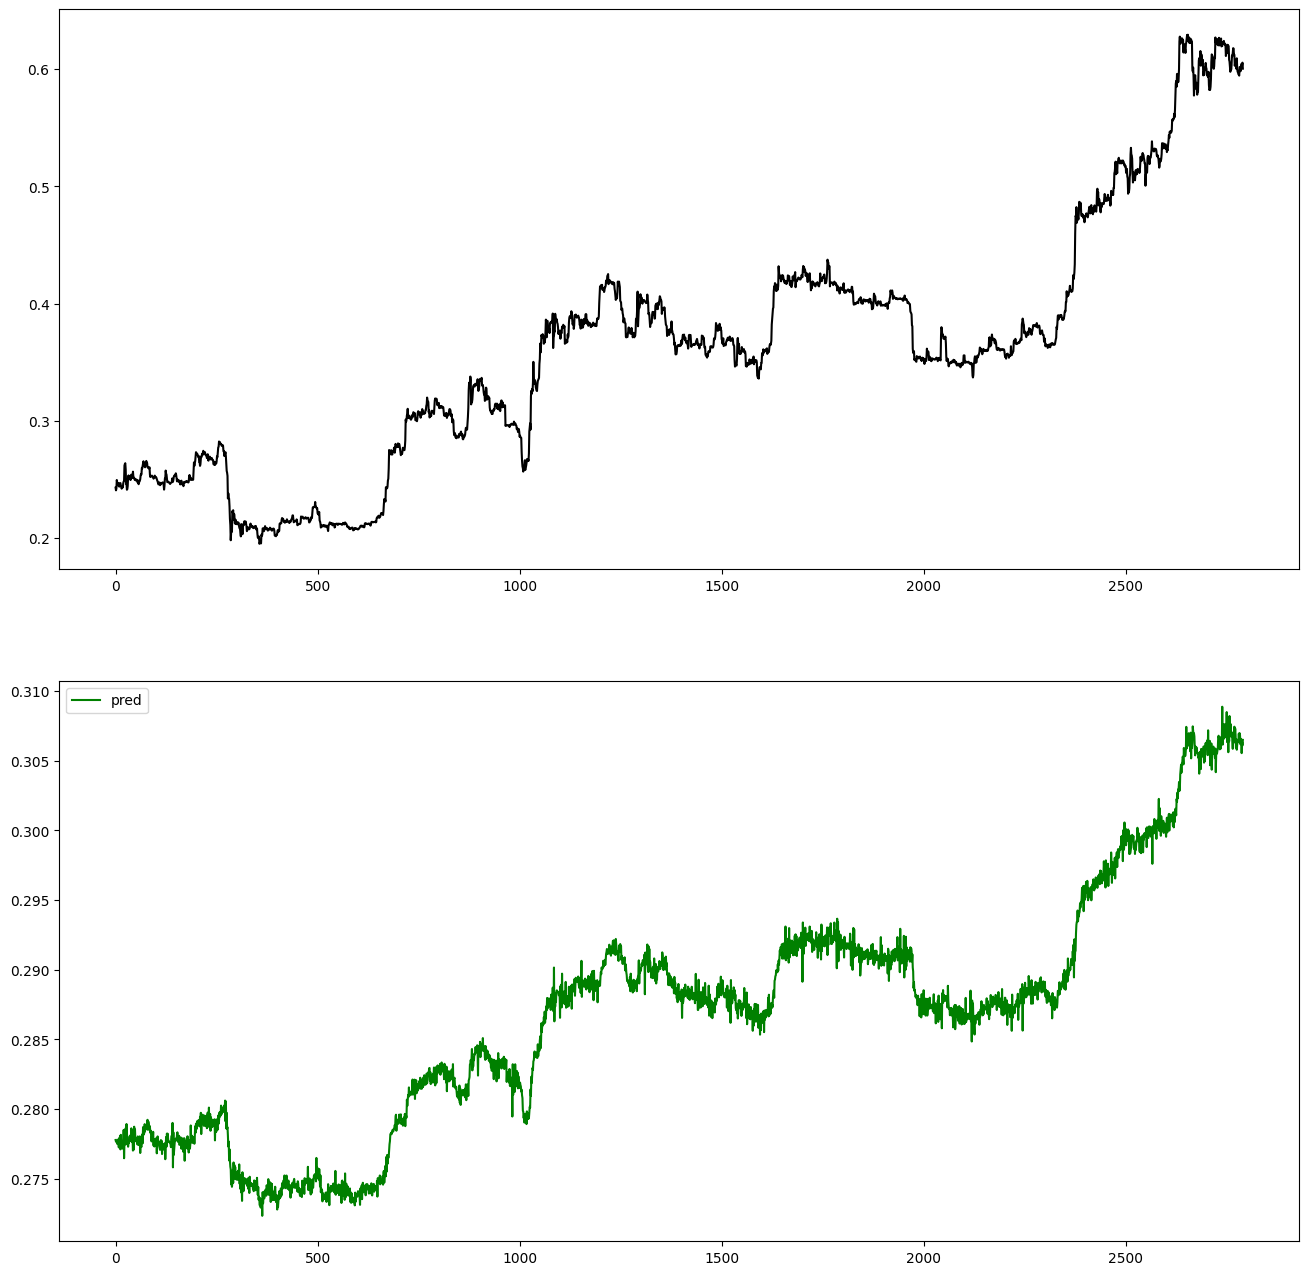

In [16]:

plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
plt.plot(y_test_tensor, color='black', label='Test')
plt.subplot(2,1,2)
plt.plot(y_pred, color='green', label='pred')
plt.legend()
plt.show()